In [19]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from IPython.display import FileLink

In [4]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape = [1])
])

In [7]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [8]:
model.fit(x, y, epochs = 200, verbose = 1)

Epoch 1/200
1/1 [==============================] - 1s 577ms/step - loss: 1.5399
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 1.3486
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 1.1954
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 1.0720
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 0.9723
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8912
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 0.8248
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7700
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7244
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6861
Epoch 11/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6536
Epoch 12/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6256
Epoch 13/200
1/1 [==============================] - 0

In [9]:
export_dir = 'D:\Data science repo\saved_model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: D:\Data science repo\saved_model\assets


INFO:tensorflow:Assets written to: D:\Data science repo\saved_model\assets


In [10]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [11]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

1080

In [12]:
interpreter = tf.lite.Interpreter(model_content = tflite_model)
interpreter.allocate_tensors()

In [13]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [15]:
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype = np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])

    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)

    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

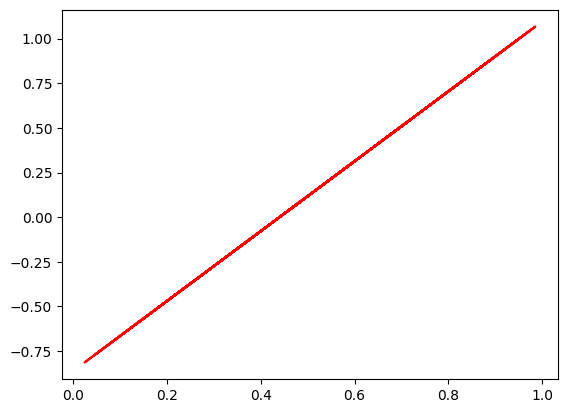

In [18]:
plt.plot(inputs, outputs, 'r')
plt.show()

In [20]:
tflite_model_file = 'model.tflite'

FileLink(tflite_model_file)

C:\Users\Harivenkat\my_project\hvenv\Data science\model.tflite